# Classifying Black and White Photos of Clothing

4423680/4422102 [==============================] - 8s 2us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


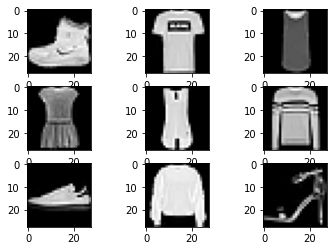

In [1]:
# example of loading the fashion mnist dataset
from keras.datasets import fashion_mnist
from matplotlib import pyplot

# load dataset
(trainX,trainy), (testX,testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' %(trainX.shape,trainy.shape))
print('Test: X=%s, y=%s' %(testX.shape,testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i],cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

## 1. Developing a Baseline Model

### 1.1 Loading dataset

In [2]:
from keras.utils import to_categorical
# load train and test dataset
def load_datset():
    # load dataset
    (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX,trainY,testX,testY

### 1.2 Prepare Pixel Data

In [3]:
# scale pixels
def prep_pixels(train,test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm,test_norm

### 1.3 Defining Model

In [4]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD
# define the model
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    # compile model
    opt = SGD(lr=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

### 1.4 Evaluate Model

In [5]:
from sklearn.model_selection import KFold
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX,dataY,n_folds=5):
    scores, histories = list(),list()
    # prepare cross validation
    kfold = KFold(n_folds,shuffle=True,random_state=7)
    # enumerate splits
    for train_ix,test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        history = model.fit(trainX,trainY,epochs=10,batch_size=32,validation_data=(testX,testY),verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX,testY,verbose=0)
        print('>%.3f' %(acc*100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores,histories

### 1.5 Summarize results

In [6]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['acc'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_acc'],color='orange',label='test')
    pyplot.show()

In [8]:
from numpy import mean
from numpy import std

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100,std(scores)*100,len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [9]:
# run test harness for evaluating model
def run_test_harness():
    # load dataset
    trainX,trainY,testX,testY = load_datset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX,testX)
    # evaluate model
    scores,histories = evaluate_model(model,trainX,trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

### 1.6 Complete Example

>91.350
>91.342
>91.058
>90.783
>91.183


<ipython-input-3-2562673d6a5c>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(211)
<ipython-input-3-2562673d6a5c>:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(212)


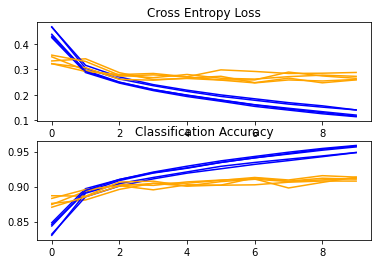

Accuracy: mean=91.143 std=0.210, n=5


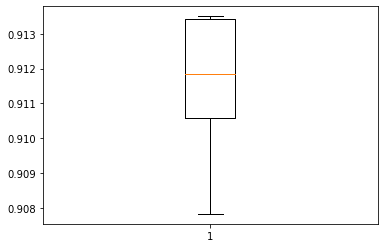

In [3]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD




# load train and test dataset
def load_datset():
    # load dataset
    (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX,trainY,testX,testY

# scale pixels
def prep_pixels(train,test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm,test_norm

# define the model
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    # compile model
    opt = SGD(lr=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX,dataY,n_folds=5):
    scores, histories = list(),list()
    # prepare cross validation
    kfold = KFold(n_folds,shuffle=True,random_state=7)
    # enumerate splits
    for train_ix,test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        history = model.fit(trainX,trainY,epochs=10,batch_size=32,validation_data=(testX,testY),verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX,testY,verbose=0)
        print('>%.3f' %(acc*100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores,histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
    pyplot.show()
    
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100,std(scores)*100,len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()
    
# run test harness for evaluating model
def run_test_harness():
    # load dataset
    trainX,trainY,testX,testY = load_datset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX,testX)
    # evaluate model
    scores,histories = evaluate_model(trainX,trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

# entry point run the test harness
run_test_harness()











## 2. Developing An Improved Model

### 2.1 Padding Convolutions

>91.383
>90.517
>91.308
>90.975
>90.733


<ipython-input-1-98c0bdd5f871>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(211)
<ipython-input-1-98c0bdd5f871>:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(212)


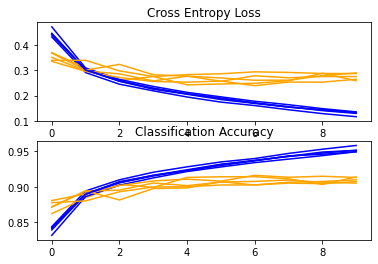

Accuracy: mean=90.983 std=0.330, n=5


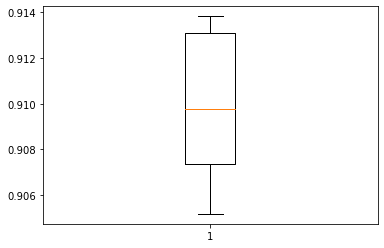

In [1]:
# model with padded convolutions for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD




# load train and test dataset
def load_datset():
    # load dataset
    (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX,trainY,testX,testY

# scale pixels
def prep_pixels(train,test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm,test_norm

# define the model
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    # compile model
    opt = SGD(lr=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX,dataY,n_folds=5):
    scores, histories = list(),list()
    # prepare cross validation
    kfold = KFold(n_folds,shuffle=True,random_state=7)
    # enumerate splits
    for train_ix,test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        history = model.fit(trainX,trainY,epochs=10,batch_size=32,validation_data=(testX,testY),verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX,testY,verbose=0)
        print('>%.3f' %(acc*100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores,histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
    pyplot.show()
    
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100,std(scores)*100,len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()
    
# run test harness for evaluating model
def run_test_harness():
    # load dataset
    trainX,trainY,testX,testY = load_datset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX,testX)
    # evaluate model
    scores,histories = evaluate_model(trainX,trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

# entry point run the test harness
run_test_harness()











### 2.2 Increasing Filters

>90.525
>90.992
>90.758
>90.425
>91.000


<ipython-input-2-8746e8132c5b>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(211)
<ipython-input-2-8746e8132c5b>:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(212)


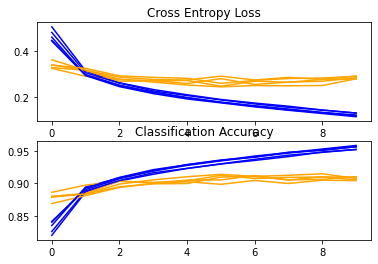

Accuracy: mean=90.740 std=0.235, n=5


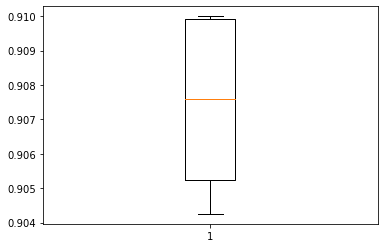

In [2]:
# model with double the filters for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD




# load train and test dataset
def load_datset():
    # load dataset
    (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX,trainY,testX,testY

# scale pixels
def prep_pixels(train,test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm,test_norm

# define the model
def define_model():
    model = Sequential()
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    # compile model
    opt = SGD(lr=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX,dataY,n_folds=5):
    scores, histories = list(),list()
    # prepare cross validation
    kfold = KFold(n_folds,shuffle=True,random_state=7)
    # enumerate splits
    for train_ix,test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        history = model.fit(trainX,trainY,epochs=10,batch_size=32,validation_data=(testX,testY),verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX,testY,verbose=0)
        print('>%.3f' %(acc*100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores,histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
    pyplot.show()
    
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100,std(scores)*100,len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()
    
# run test harness for evaluating model
def run_test_harness():
    # load dataset
    trainX,trainY,testX,testY = load_datset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX,testX)
    # evaluate model
    scores,histories = evaluate_model(trainX,trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

# entry point run the test harness
run_test_harness()











## 3. Finalizing the Model and Making Predictions

### 3.1 Saving Final Model

In [3]:
# save the model to file
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD




# load train and test dataset
def load_datset():
    # load dataset
    (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX,trainY,testX,testY

# scale pixels
def prep_pixels(train,test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm,test_norm

# define the model
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    # compile model
    opt = SGD(lr=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

    
    # run test harness for evaluating model
def run_test_harness():
    # load dataset
    trainX,trainY,testX,testY = load_datset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX,testX)
    # define model
    model = define_model()
    # fit model
    model.fit(trainX,trainY,epochs=10,batch_size=32,verbose=0)
    # save model
    model.save('fashion_mnist_model.h5')

# entry point run the test harness
run_test_harness()











### 3.2 Evaluating Final Model

In [4]:
# evaluate the deep model on the test dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model




# load train and test dataset
def load_datset():
    # load dataset
    (trainX,trainY),(testX,testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX,trainY,testX,testY

# scale pixels
def prep_pixels(train,test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm,test_norm

    
# run test harness for evaluating model
def run_test_harness():
    # load dataset
    trainX,trainY,testX,testY = load_datset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX,testX)
    # define model
    model = load_model('fashion_mnist_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f ' % (acc * 100.0))    

# entry point run the test harness
run_test_harness()











> 89.780 


### 3.3 Making Prediction

In [14]:
# make a prediction for a new image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename,grayscale=True,target_size=(28,28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1,28,28,1)
    # prepare pixel data
    img = img.astype('float32')
    img = img/255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image1.png')
    # load model
    model = load_model('fashion_mnist_model.h5')
    # predict the class
    result = model.predict_classes(img)
    print(result[0])

# entry point run the example
run_example()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f939de00ef0>